In [1]:
import numpy as np
import pandas as pd

In [2]:
base_data = pd.read_csv("mental_health_finaldata_1.csv")
base_data

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,30-Above,Female,Housewife,Go out Every day,Yes,Maybe,No,No,No,Low,No,No,Yes
795,25-30,Male,Student,Go out Every day,Maybe,Yes,Maybe,No,Maybe,High,Yes,Maybe,No
796,20-25,Male,Others,Go out Every day,Yes,No,Yes,No,Maybe,Medium,Yes,No,Maybe
797,30-Above,Female,Housewife,1-14 days,Yes,Yes,No,Yes,Maybe,High,No,Yes,Yes


In [3]:
base_data.columns

Index(['Age', 'Sex', 'Occupation', 'Days Indoors', 'Growing Stress',
       'Quarantine Frustrations', 'Changes Habits', 'Mental Health History',
       'Weight Change', 'Mood Swings', 'Coping Struggles', 'Work Interest',
       'Social Weakness'],
      dtype='object')

In [4]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      799 non-null    object
 1   Sex                      799 non-null    object
 2   Occupation               799 non-null    object
 3   Days Indoors             799 non-null    object
 4   Growing Stress           799 non-null    object
 5   Quarantine Frustrations  799 non-null    object
 6   Changes Habits           799 non-null    object
 7   Mental Health History    799 non-null    object
 8   Weight Change            799 non-null    object
 9   Mood Swings              799 non-null    object
 10  Coping Struggles         799 non-null    object
 11  Work Interest            799 non-null    object
 12  Social Weakness          799 non-null    object
dtypes: object(13)
memory usage: 81.3+ KB


In [5]:
base_data.describe()

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
count,799,799,799,799,799,799,799,799,799,799,799,799,799
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,Maybe,Maybe,Low,No,No,Maybe
freq,217,425,182,168,292,298,302,276,271,271,401,285,273


In [6]:
for column in base_data.columns:
    print(base_data[column].value_counts())


Age
30-Above    217
16-20       202
25-30       199
20-25       181
Name: count, dtype: int64
Sex
Female    425
Male      374
Name: count, dtype: int64
Occupation
Housewife    182
Student      172
Corporate    155
Others       149
Business     141
Name: count, dtype: int64
Days Indoors
31-60 days            168
1-14 days             165
Go out Every day      162
More than 2 months    154
15-30 days            150
Name: count, dtype: int64
Growing Stress
Yes      292
Maybe    257
No       250
Name: count, dtype: int64
Quarantine Frustrations
Yes      298
Maybe    258
No       243
Name: count, dtype: int64
Changes Habits
Yes      302
Maybe    255
No       242
Name: count, dtype: int64
Mental Health History
Maybe    276
No       275
Yes      248
Name: count, dtype: int64
Weight Change
Maybe    271
No       270
Yes      258
Name: count, dtype: int64
Mood Swings
Low       271
Medium    270
High      258
Name: count, dtype: int64
Coping Struggles
No     401
Yes    398
Name: count, dtype: int

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'Growing Stress' is your target variable
target_variable = "Growing Stress"

# Selecting features (excluding the target variable)
features = base_data.drop(columns=[target_variable])

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=["object"]).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Convert the target variable to numerical
base_data[target_variable] = label_encoder.fit_transform(base_data[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, base_data[target_variable], test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)


Accuracy: 0.29

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.22      0.25        55
           1       0.26      0.26      0.26        50
           2       0.31      0.38      0.34        55

    accuracy                           0.29       160
   macro avg       0.28      0.29      0.28       160
weighted avg       0.29      0.29      0.28       160



Feature Importances:
                    Feature  Importance
3              Days Indoors    0.121360
2                Occupation    0.120317
0                       Age    0.098614
10            Work Interest    0.083766
7             Weight Change    0.083297
11          Social Weakness    0.082054
4   Quarantine Frustrations    0.081482
6     Mental Health History    0.079041
8               Mood Swings    0.074811
5            Changes Habits    0.074213
9          Coping Struggles    0.053780
1                       Sex    0.047266


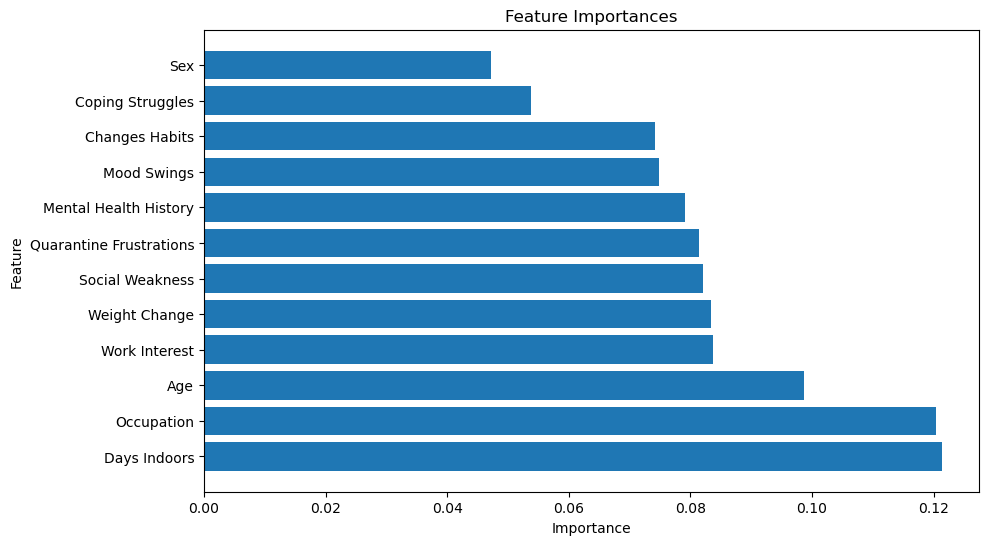

In [8]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plotting the feature importances for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Growing Stress' is your target variable
target_variable = "Growing Stress"

# Create a copy of the dataframe for plotting
plot_data = base_data.copy()

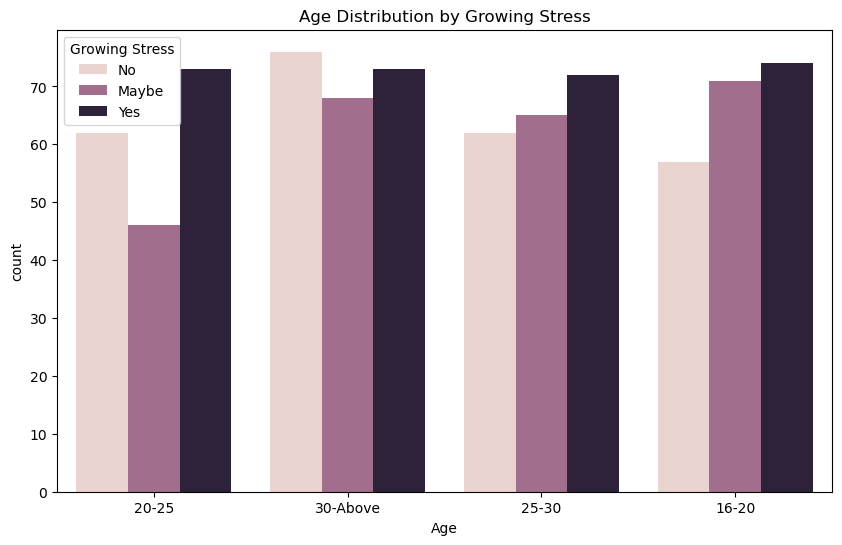

In [10]:
# Plotting 'Age' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Age", hue=target_variable, data=plot_data)

# Map the legend labels to the original values
legend_labels = {0: "Yes", 1: "Maybe", 2: "No"}
hue_labels = plot_data[target_variable].unique()
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])

plt.title(f"Age Distribution by {target_variable}")
plt.show()

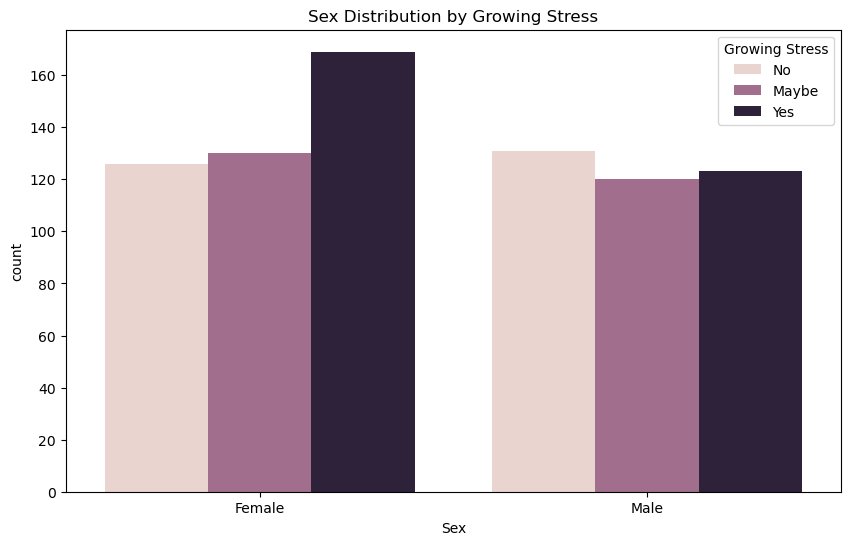

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Sex", hue=target_variable, data=plot_data)

# Map the legend labels to the original values
hue_labels = plot_data[target_variable].unique()
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])

plt.title(f"Sex Distribution by {target_variable}")
plt.show()

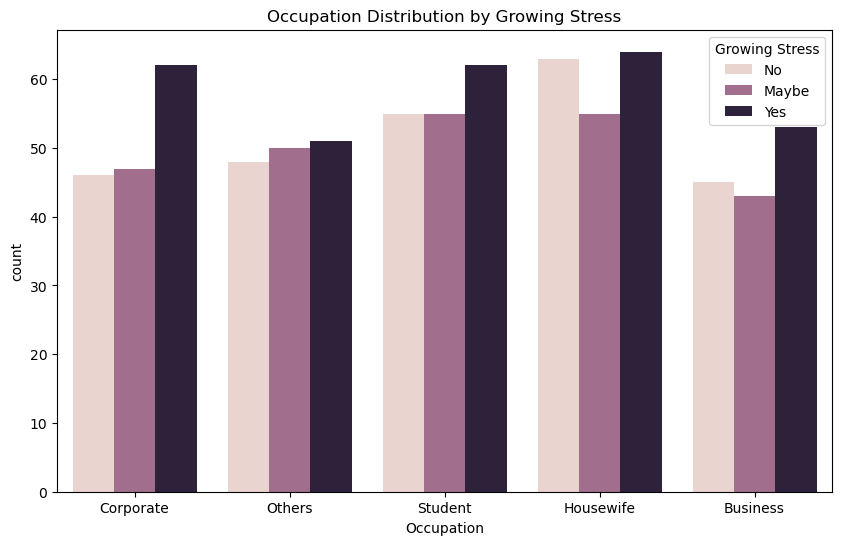

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Occupation", hue=target_variable, data=plot_data)


hue_labels = plot_data[target_variable].unique()
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])

plt.title(f"Occupation Distribution by {target_variable}")
plt.show()

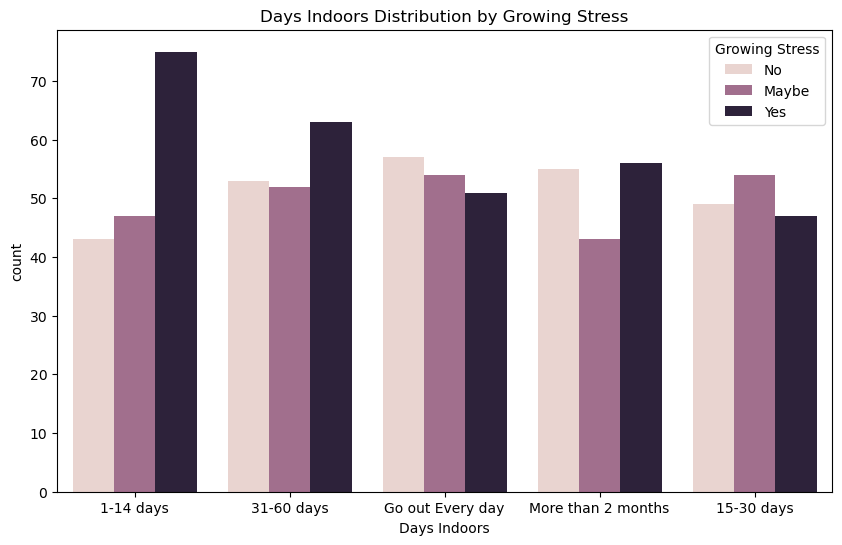

In [13]:
# Plotting 'Days Indoors' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Days Indoors", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Days Indoors Distribution by {target_variable}")
plt.show()

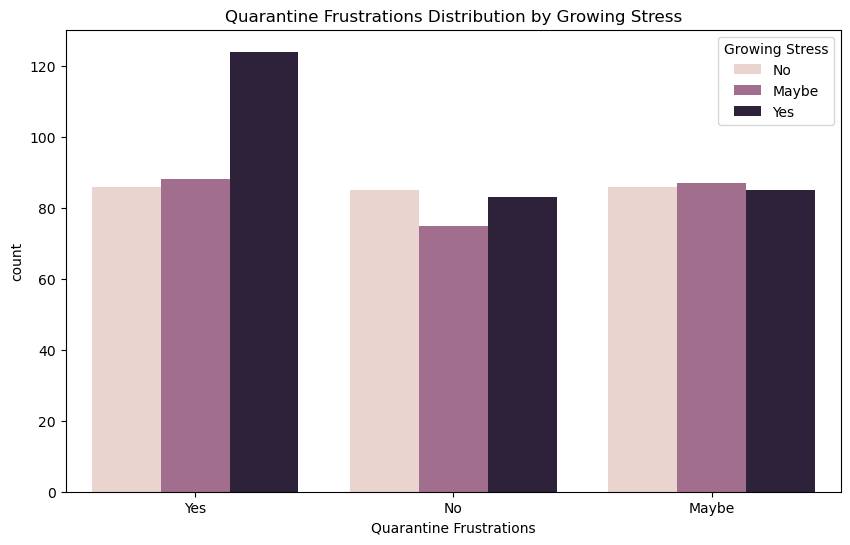

In [14]:
# Plotting 'Quarantine Frustrations' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Quarantine Frustrations", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Quarantine Frustrations Distribution by {target_variable}")
plt.show()

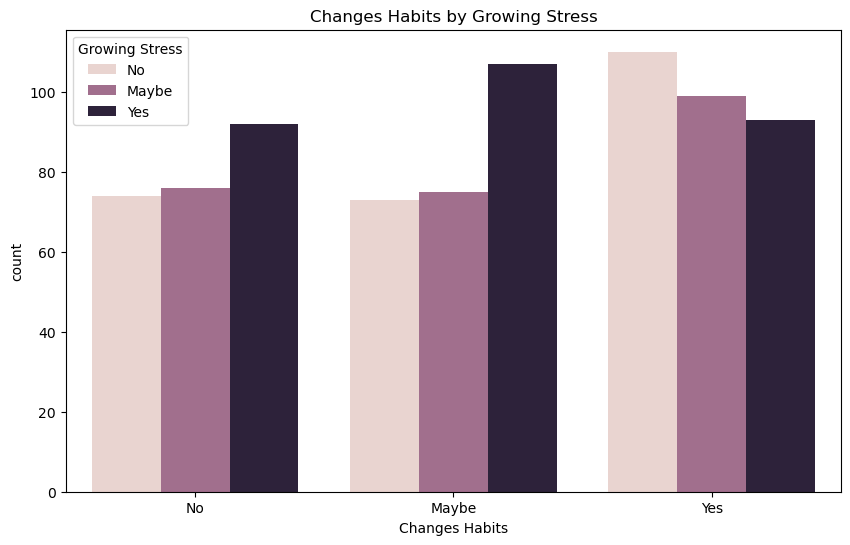

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Changes Habits", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Changes Habits by {target_variable}")
plt.show()

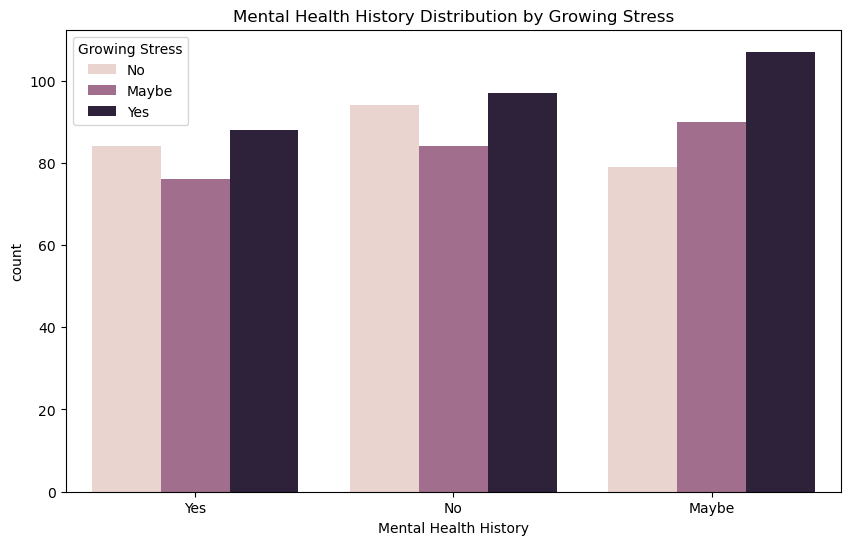

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Mental Health History", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Mental Health History Distribution by {target_variable}")
plt.show()

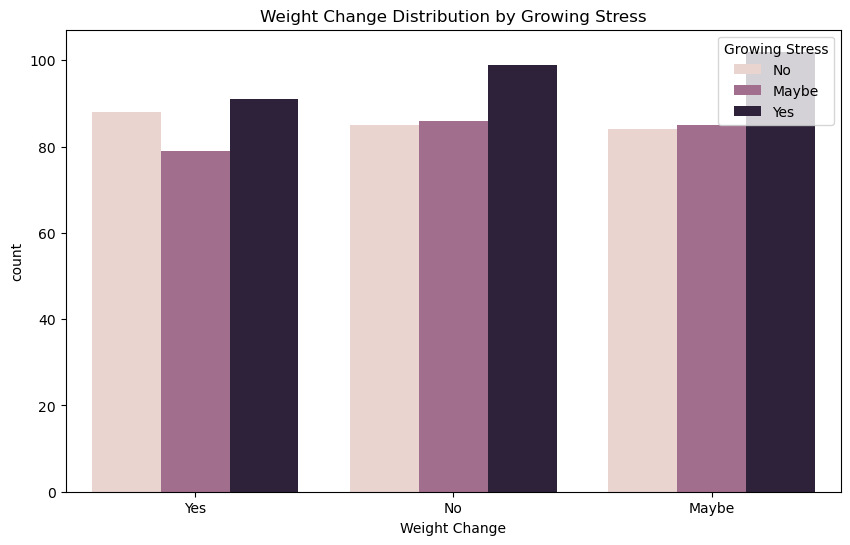

In [17]:
# Plotting 'Weight Change' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Weight Change", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Weight Change Distribution by {target_variable}")
plt.show()

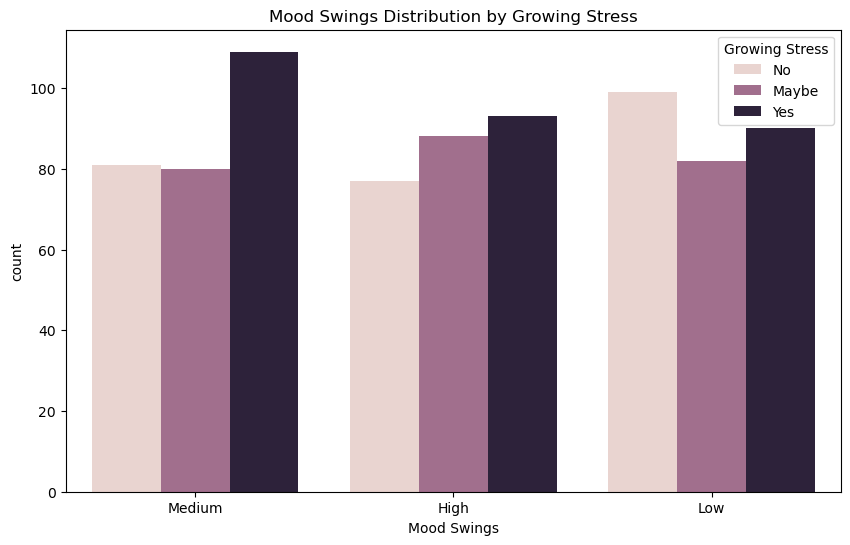

In [18]:
# Plotting 'Mood Swings' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Mood Swings", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Mood Swings Distribution by {target_variable}")
plt.show()

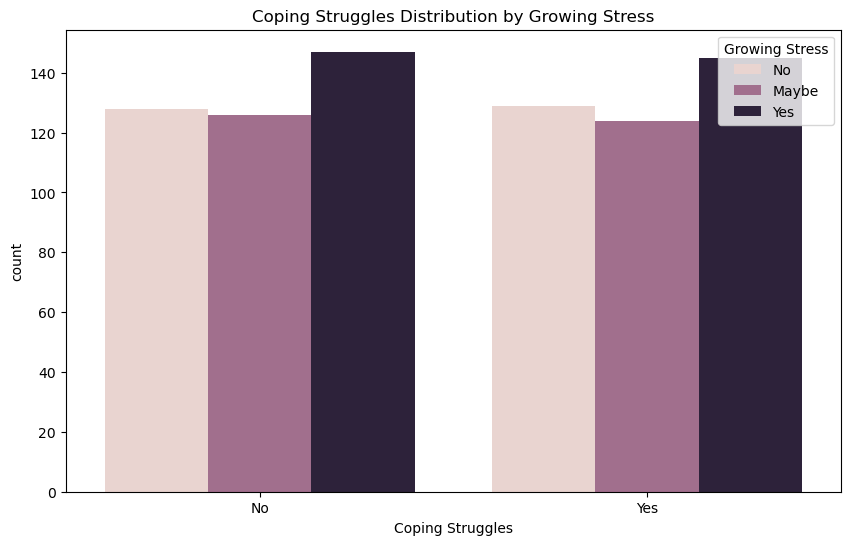

In [19]:
# Plotting 'Coping Struggles' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Coping Struggles", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Coping Struggles Distribution by {target_variable}")
plt.show()

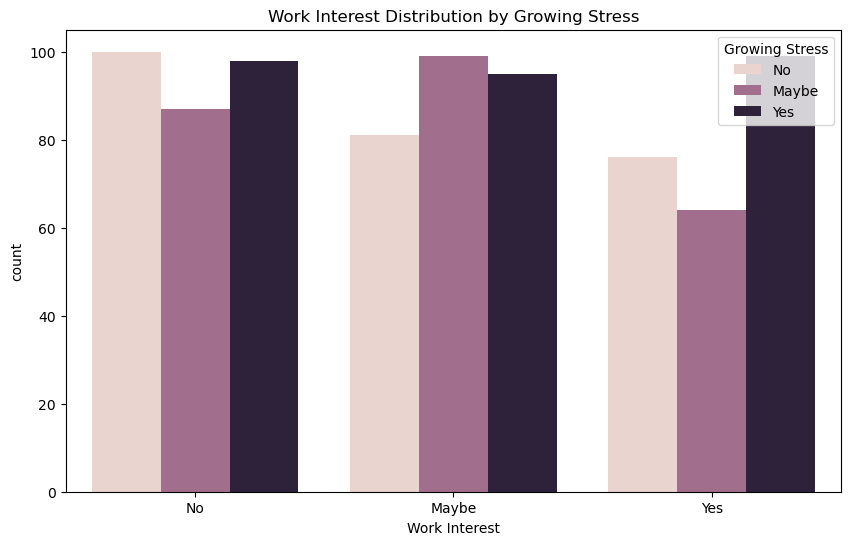

In [20]:
# Plotting 'Work Interest' against the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x="Work Interest", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Work Interest Distribution by {target_variable}")
plt.show()

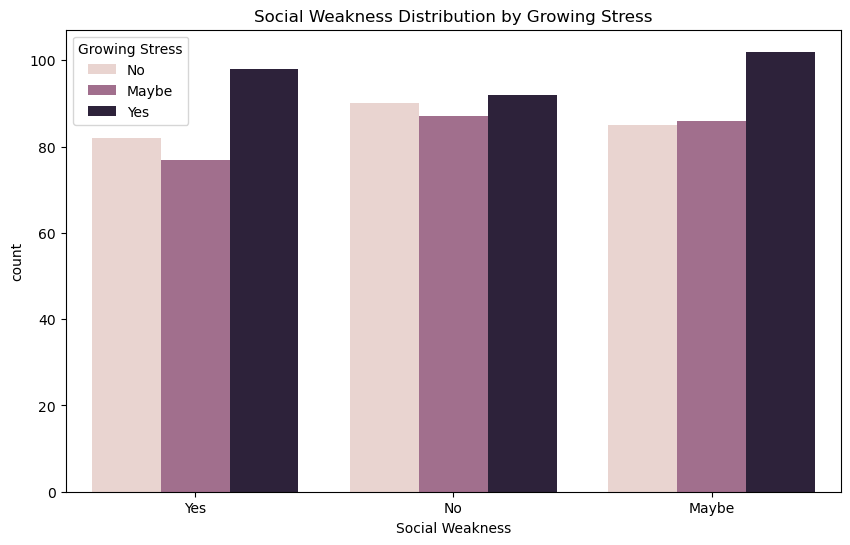

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Social Weakness", hue=target_variable, data=plot_data)
plt.legend(title=target_variable, labels=[legend_labels[label] for label in hue_labels])
plt.title(f"Social Weakness Distribution by {target_variable}")
plt.show()

In [22]:
plot_data["Growing Stress"].value_counts()

Growing Stress
2    292
0    257
1    250
Name: count, dtype: int64

In [23]:
base_data

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
0,20-25,Female,Corporate,1-14 days,2,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,2,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,1,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,2,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,2,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,30-Above,Female,Housewife,Go out Every day,2,Maybe,No,No,No,Low,No,No,Yes
795,25-30,Male,Student,Go out Every day,0,Yes,Maybe,No,Maybe,High,Yes,Maybe,No
796,20-25,Male,Others,Go out Every day,2,No,Yes,No,Maybe,Medium,Yes,No,Maybe
797,30-Above,Female,Housewife,1-14 days,2,Yes,No,Yes,Maybe,High,No,Yes,Yes


In [25]:
# Example preprocessing (modify as needed)
cluster_data = base_data.copy() # Remove unnecessary columns
cluster_data = pd.get_dummies(cluster_data)  # One-hot encode categorical variables if necessary
cluster_data

,Growing Stress,Age_16-20,Age_20-25,Age_25-30,Age_30-Above,Sex_Female,Sex_Male,Occupation_Business,Occupation_Corporate,Occupation_Housewife,...,Mood Swings_Low,Mood Swings_Medium,Coping Struggles_No,Coping Struggles_Yes,Work Interest_Maybe,Work Interest_No,Work Interest_Yes,Social Weakness_Maybe,Social Weakness_No,Social Weakness_Yes
0,2,False,True,False,False,True,False,False,True,False,...,False,True,True,False,False,True,False,False,False,True
1,2,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,1,False,False,False,True,True,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False
3,2,False,False,True,False,False,True,False,False,False,...,False,True,True,False,True,False,False,False,False,True
4,2,True,False,False,False,True,False,False,False,False,...,False,True,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,2,False,False,False,True,True,False,False,False,True,...,True,False,True,False,False,True,False,False,False,True
795,0,False,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
796,2,False,True,False,False,False,True,False,False,False,...,False,True,False,True,False,True,False,True,False,False
797,2,False,False,False,True,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


In [27]:
scaled_data

array([[ 1.15515713, -0.58168588,  1.84779995, ..., -0.72042446,
        -0.71242345,  1.45222223],
       [ 1.15515713, -0.58168588, -0.54118413, ..., -0.72042446,
        -0.71242345,  1.45222223],
       [-0.0529195 , -0.58168588, -0.54118413, ..., -0.72042446,
         1.40365958, -0.68859984],
       ...,
       [ 1.15515713, -0.58168588,  1.84779995, ...,  1.38807058,
        -0.71242345, -0.68859984],
       [ 1.15515713, -0.58168588, -0.54118413, ..., -0.72042446,
        -0.71242345,  1.45222223],
       [-0.0529195 , -0.58168588, -0.54118413, ..., -0.72042446,
         1.40365958, -0.68859984]])

In [28]:
from sklearn.cluster import KMeans

# Example: Using K-Means with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_labels

/Users/hakankorpe/opt/anaconda3/envs/jan4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hakankorpe/opt/anaconda3/envs/jan4/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


array([1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0,

In [29]:
# Add cluster labels to the original dataset
base_data['Cluster_Labels'] = cluster_labels

# Analyze cluster distribution
cluster_counts = base_data['Cluster_Labels'].value_counts()
print("Cluster Distribution:\n", cluster_counts)


Cluster Distribution:
 Cluster_Labels
0    374
2    226
1    199
Name: count, dtype: int64


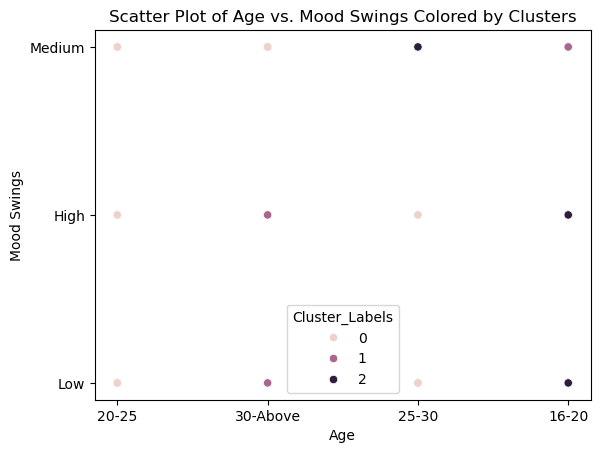

In [34]:
# Example: Scatter plot for two features colored by cluster labels
sns.scatterplot(x='Age', y='Mood Swings', hue='Cluster_Labels', data=base_data)
plt.title("Scatter Plot of Age vs. Mood Swings Colored by Clusters")
plt.show()


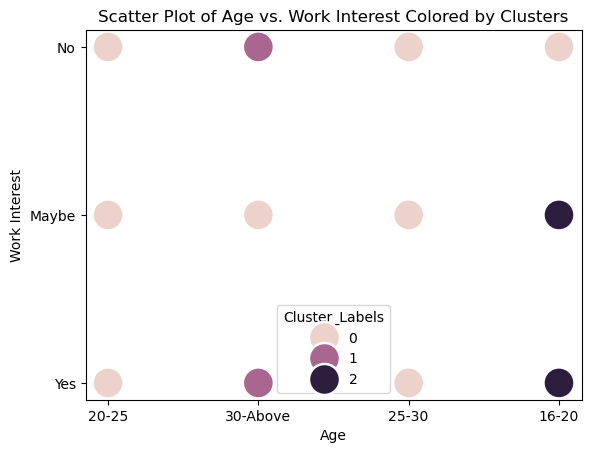

In [45]:
sns.scatterplot(x='Age', y='Work Interest', hue='Cluster_Labels', data=base_data, s=500)  # Adjust the 's' parameter
plt.title("Scatter Plot of Age vs. Work Interest Colored by Clusters")
plt.show()
